# Module 1: Dense Neural Networks

In this notebook, we will explore the mathematical foundations of dense neural networks and their training dynamics.

---

## Contents
1. Vector Spaces, Linear Maps, and Compositions
2. Universal Approximation
3. Gradient Descent
4. Nonlinear Activations
5. Loss Functions


## 1. Vector Spaces, Linear Maps, and Compositions

A **dense layer** in a neural network is a linear map:

$$
f(\mathbf{x}) = W \mathbf{x} + b
$$

where:
- $\mathbf{x} \in \mathbb{R}^n$ is the input vector,
- $W \in \mathbb{R}^{m \times n}$ is the weight matrix,
- $b \in \mathbb{R}^m$ is the bias.

When we stack layers with nonlinearities, we obtain a composition:

$$
f(\mathbf{x}) = \sigma \big(W_2 (\sigma(W_1 \mathbf{x} + b_1)) + b_2 \big)
$$

where $\sigma$ is a nonlinear activation function.

In [2]:
import tensorflow as tf
import numpy as np
import math

import matplotlib.pyplot as plt

2025-10-03 11:41:54.121198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759513314.139319 2080504 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759513314.144793 2080504 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759513314.158553 2080504 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759513314.158579 2080504 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1759513314.158581 2080504 computation_placer.cc:177] computation placer alr

In [3]:
# Example: a simple linear transformation
x = tf.constant([[1.0, 2.0]], dtype=tf.float32)  # input vector

#x = tf.Variable([[1.0, 2.0]], dtype=tf.float32)

#x = np.array([[1.0, 2.0]])
#x = tf.convert_to_tensor(x, dtype=tf.float32)

W = tf.constant([[2.0, -1.0],
                 [0.5, 3.0]], dtype=tf.float32)  # weight matrix
b = tf.constant([1.0, -2.0], dtype=tf.float32)   # bias

y = tf.matmul(x, W) + b
y

I0000 00:00:1759513317.104135 2080504 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 919 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:07:00.0, compute capability: 8.9


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[4., 3.]], dtype=float32)>

In [4]:
tf.keras.activations.sigmoid(tf.matmul(x, W) + b)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.98201376, 0.95257413]], dtype=float32)>

## 2. Universal Approximation

- **Universal Approximation Theorem**: A feedforward neural network with a single hidden layer
  containing a finite number of neurons can approximate any continuous function on compact subsets of $\mathbb{R}^n$,
  given a activation function (e.g. sigmoid, ReLU).

In [5]:
# Data
X = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y_true = np.sin(X)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y_true, epochs=500, verbose=1)

y_pred = model.predict(X)

/home/gibran/anaconda3/envs/tf219/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500


I0000 00:00:1759513318.258515 2083183 service.cc:152] XLA service 0x7af0080030f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759513318.258543 2083183 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2025-10-03 11:41:58.283060: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759513318.345321 2083183 cuda_dnn.cc:529] Loaded cuDNN version 91001


1/7 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - loss: 0.7701

I0000 00:00:1759513318.576933 2083183 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.7726
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5450 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4907 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4701 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4962 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4933 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4193 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4231 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4034 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4211 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4264 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3789 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4015 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3792 
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3777 
Epoch 16/500
7/7 ━━━━━━━━━━━━━━

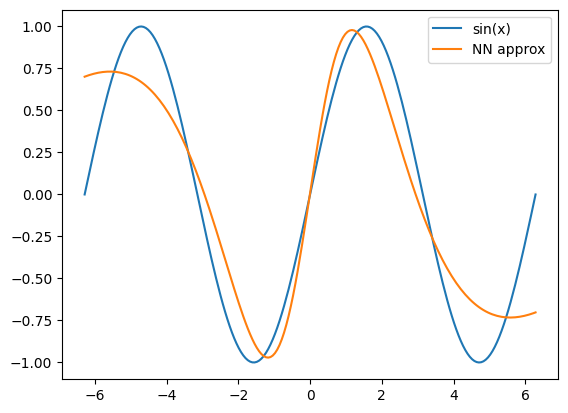

In [6]:
plt.plot(X, y_true, label="sin(x)")
plt.plot(X, y_pred, label="NN approx")
plt.legend()
plt.show()

In [7]:
def taylor_sin(x, order):
    n_terms = (order // 2) + 1  
    out = np.zeros_like(x)
    for k in range(n_terms):
        p = 2*k + 1
        out = out + ((-1)**k) * np.power(x, p) / math.factorial(p)
    return out


taylor_preds = taylor_sin(X, 5)

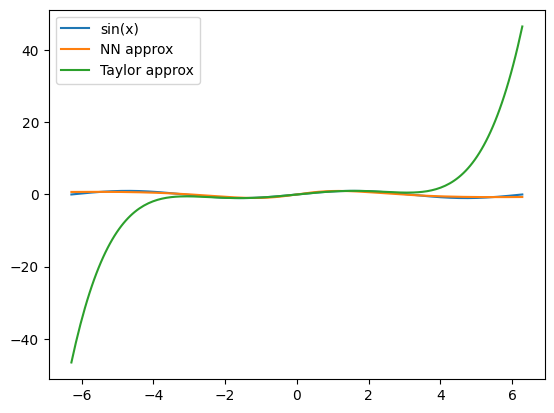

In [8]:
plt.plot(X, y_true, label="sin(x)")
plt.plot(X, y_pred, label="NN approx")
plt.plot(X, taylor_preds, label="Taylor approx")
plt.legend()
plt.show()


In [9]:
def mse(a, b):
    return float(np.mean((a - b)**2))

def max_abs_err(a, b):
    return float(np.max(np.abs(a - b)))

nn_mse = mse(y_pred, y_true)
nn_max = max_abs_err(y_pred, y_true)

t_mse = mse(taylor_preds, y_true)
t_max = max_abs_err(taylor_preds, y_true)


metrics = {
    'NeuralNet': {'MSE': nn_mse, 'MaxAbsErr': nn_max},
    'Taylor': {'MSE': t_mse, 'MaxAbsErr': t_max},
}


In [10]:
print("{:<15s}  {:>12s}  {:>12s}".format("Approximator", "MSE", "Max|err|"))
for k, v in metrics.items():
    print("{:<15s}  {:>12.6e}  {:>12.6e}".format(k, v['MSE'], v['MaxAbsErr']))

Approximator              MSE      Max|err|
NeuralNet        6.141808e-02  7.018973e-01
Taylor           1.720090e+02  4.654673e+01


## 3. Gradient Descent

We minimize a loss function $L(\theta)$ using **gradient descent**:

$$
\theta_{t+1} = \theta_t - \eta \nabla L(\theta_t)
$$

Variants:
- SGD (stochastic gradient descent)
- Momentum
- RMSProp
- Adam

Each changes the update dynamics depending on the curvature of the loss.

In [11]:
def F(x):
    return (x + 1)**2

In [12]:
x = tf.Variable(initial_value=2.0, name='x', trainable=True, dtype=tf.float32)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

In [13]:
for _ in range(1000):

    with tf.GradientTape() as tape:
        y = F(x) 
        
    gradients = tape.gradient(y, [x])
    optimizer.apply_gradients(zip(gradients, [x]))
    print("y:",y.numpy(), "x:",x.numpy())

y: 9.0 x: 1.4
y: 5.7600007 x: 0.91999996
y: 3.6864 x: 0.53599995
y: 2.359296 x: 0.22879994
y: 1.5099493 x: -0.016960055
y: 0.9663676 x: -0.21356805
y: 0.61847526 x: -0.37085444
y: 0.39582413 x: -0.49668354
y: 0.25332746 x: -0.59734684
y: 0.16212957 x: -0.6778775
y: 0.10376291 x: -0.742302
y: 0.06640826 x: -0.7938416
y: 0.042501286 x: -0.8350733
y: 0.02720082 x: -0.8680586
y: 0.017408527 x: -0.8944469
y: 0.011141455 x: -0.9155575
y: 0.0071305353 x: -0.932446
y: 0.0045635425 x: -0.9459568
y: 0.0029206646 x: -0.9567655
y: 0.0018692244 x: -0.9654124
y: 0.0011963035 x: -0.9723299
y: 0.00076563365 x: -0.9778639
y: 0.0004900066 x: -0.9822911
y: 0.00031360507 x: -0.98583287
y: 0.00020070758 x: -0.9886663
y: 0.00012845284 x: -0.99093306
y: 8.220939e-05 x: -0.9927465
y: 5.2613665e-05 x: -0.9941972
y: 3.3672604e-05 x: -0.99535775
y: 2.1550468e-05 x: -0.9962862
y: 1.3792211e-05 x: -0.99702895
y: 8.827157e-06 x: -0.99762315
y: 5.649437e-06 x: -0.9980985
y: 3.6157303e-06 x: -0.9984788
y: 2.31414e-06

### Class based model

In [14]:
# Data
X = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y_true = np.sin(X)

In [15]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(258, activation='tanh')
        self.d2 = tf.keras.layers.Dense(258, activation='tanh')
        self.out = tf.keras.layers.Dense(1)

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.out(x)

# Instantiate
model = MyModel()

In [16]:
# Optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError()

dataset = tf.data.Dataset.from_tensor_slices((X, y_true)).batch(32)

# Training step
@tf.function
def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(x_batch, training=True)
        loss = loss_fn(y_batch, predictions)
    # Compute gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    # Apply updates
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [17]:
EPOCHS = 100
for epoch in range(EPOCHS):
    for step, (x_batch, y_batch) in enumerate(dataset):
        loss = train_step(x_batch, y_batch)
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

2025-10-03 11:42:24.531731: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-03 11:42:24.547305: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-03 11:42:24.577288: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-03 11:42:24.633837: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Loss: 0.0843
Epoch 2, Loss: 0.1120
Epoch 3, Loss: 0.9359
Epoch 4, Loss: 1.6981
Epoch 5, Loss: 4.7937
Epoch 6, Loss: 2.6068
Epoch 7, Loss: 1.1591
Epoch 8, Loss: 0.2007
Epoch 9, Loss: 0.0980
Epoch 10, Loss: 0.3881
Epoch 11, Loss: 0.1054
Epoch 12, Loss: 0.0488
Epoch 13, Loss: 0.2359
Epoch 14, Loss: 0.1024
Epoch 15, Loss: 0.1403
Epoch 16, Loss: 0.1870
Epoch 17, Loss: 0.1418
Epoch 18, Loss: 0.1972
Epoch 19, Loss: 0.1815
Epoch 20, Loss: 0.1999
Epoch 21, Loss: 0.2131
Epoch 22, Loss: 0.2150
Epoch 23, Loss: 0.2339
Epoch 24, Loss: 0.2345
Epoch 25, Loss: 0.2503
Epoch 26, Loss: 0.2528
Epoch 27, Loss: 0.2650
Epoch 28, Loss: 0.2678
Epoch 29, Loss: 0.2782


2025-10-03 11:42:24.753428: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 30, Loss: 0.2796
Epoch 31, Loss: 0.2890
Epoch 32, Loss: 0.2885
Epoch 33, Loss: 0.2971
Epoch 34, Loss: 0.2947
Epoch 35, Loss: 0.3025
Epoch 36, Loss: 0.2979
Epoch 37, Loss: 0.3059
Epoch 38, Loss: 0.2980
Epoch 39, Loss: 0.3075
Epoch 40, Loss: 0.2951
Epoch 41, Loss: 0.3078
Epoch 42, Loss: 0.2893
Epoch 43, Loss: 0.3076


2025-10-03 11:42:24.978399: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Loss: 0.2803
Epoch 45, Loss: 0.3078
Epoch 46, Loss: 0.2675
Epoch 47, Loss: 0.3105
Epoch 48, Loss: 0.2498
Epoch 49, Loss: 0.3188
Epoch 50, Loss: 0.2252
Epoch 51, Loss: 0.3381
Epoch 52, Loss: 0.1901
Epoch 53, Loss: 0.3787
Epoch 54, Loss: 0.1414
Epoch 55, Loss: 0.4629
Epoch 56, Loss: 0.0796
Epoch 57, Loss: 0.6389
Epoch 58, Loss: 0.0281
Epoch 59, Loss: 1.0056
Epoch 60, Loss: 0.0718
Epoch 61, Loss: 1.6614
Epoch 62, Loss: 0.2871
Epoch 63, Loss: 2.0698
Epoch 64, Loss: 0.2093
Epoch 65, Loss: 1.0017
Epoch 66, Loss: 0.0632
Epoch 67, Loss: 0.1726
Epoch 68, Loss: 0.3346
Epoch 69, Loss: 0.1118
Epoch 70, Loss: 0.2507
Epoch 71, Loss: 0.2024
Epoch 72, Loss: 0.1768


2025-10-03 11:42:25.464967: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Loss: 0.2252
Epoch 74, Loss: 0.1871
Epoch 75, Loss: 0.2008
Epoch 76, Loss: 0.2022
Epoch 77, Loss: 0.1914
Epoch 78, Loss: 0.1989
Epoch 79, Loss: 0.1922
Epoch 80, Loss: 0.1917
Epoch 81, Loss: 0.1910
Epoch 82, Loss: 0.1876
Epoch 83, Loss: 0.1870
Epoch 84, Loss: 0.1846
Epoch 85, Loss: 0.1828
Epoch 86, Loss: 0.1812
Epoch 87, Loss: 0.1792
Epoch 88, Loss: 0.1776
Epoch 89, Loss: 0.1758
Epoch 90, Loss: 0.1741
Epoch 91, Loss: 0.1726
Epoch 92, Loss: 0.1709
Epoch 93, Loss: 0.1694
Epoch 94, Loss: 0.1680
Epoch 95, Loss: 0.1663
Epoch 96, Loss: 0.1650
Epoch 97, Loss: 0.1636
Epoch 98, Loss: 0.1623
Epoch 99, Loss: 0.1609
Epoch 100, Loss: 0.1597


In [18]:
y_pred = model.predict(X)

2025-10-03 11:42:26.985768: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 120 bytes spill stores, 120 bytes spill loads

2025-10-03 11:42:27.156249: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 96 bytes spill stores, 96 bytes spill loads

2025-10-03 11:42:27.159112: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 16 bytes spill stores, 16 bytes spill loads

2025-10-03 11:42:27.288587: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 16 bytes spill stores, 16 bytes spill loads

2025-10-03 11:42:27.293736: I external/local_x

1/7 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step

2025-10-03 11:42:29.827601: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 264 bytes spill stores, 264 bytes spill loads

2025-10-03 11:42:29.890434: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 124 bytes spill stores, 124 bytes spill loads

2025-10-03 11:42:29.987940: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 148 bytes spill stores, 148 bytes spill loads

2025-10-03 11:42:30.084256: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14', 124 bytes spill stores, 124 bytes spill loads

2025-10-03 11:42:30.147685: I external/l

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step


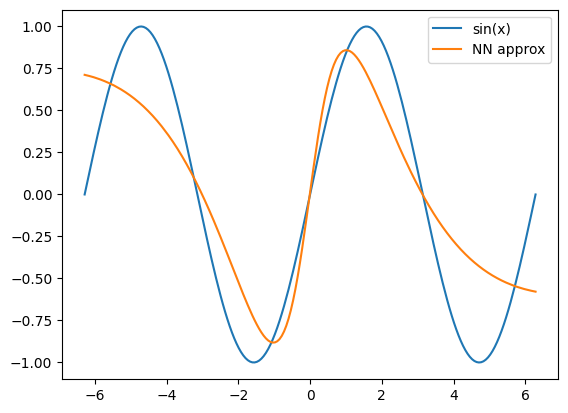

In [19]:
plt.plot(X, y_true, label="sin(x)")
plt.plot(X, y_pred, label="NN approx")
plt.legend()
plt.show()

## 4. Activation Functions

Common nonlinearities:
- Sigmoid: bounded, smooth, suffers vanishing gradient.
- Tanh: zero-centered, still vanishes for large inputs.
- ReLU: non-saturating, sparse activations.
- GELU: smooth ReLU, often used in transformers.

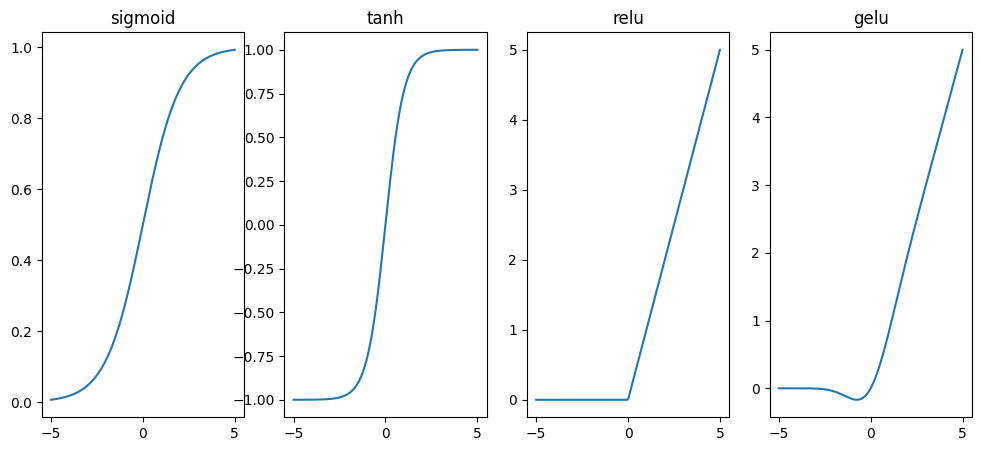

In [20]:
# Plot activations and derivatives
activations = {
    "sigmoid": tf.nn.sigmoid,
    "tanh": tf.nn.tanh,
    "relu": tf.nn.relu,
    "gelu": tf.nn.gelu
}

x = np.linspace(-5, 5, 200)

plt.figure(figsize=(12,5))
for i, (name, f) in enumerate(activations.items()):
    plt.subplot(1,4,i+1)
    y = f(x).numpy()
    plt.plot(x, y, label=name)
    plt.title(name)
plt.show()

## 5. Loss Functions

En este notebook exploraremos las funciones de pérdida más usadas en deep learning, 
su interpretación matemática y cómo implementarlas en TensorFlow/Keras.

---

## Contenido
5.1 Pérdidas para regresión
   - MSE
   - MAE
   - Huber
5.2 Pérdidas para clasificación
   - Binary Cross-Entropy
   - Categorical Cross-Entropy
   - Sparse Categorical Cross-Entropy
5.3 Regularización en la pérdida
5.4 Ejercicios comparativos

### 5.1. Pérdidas para Regresión

#### Mean Squared Error (MSE)
$$
L = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

Asume que los errores siguen una distribución Gaussiana.

#### Mean Absolute Error (MAE)
$$
L = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y}_i|
$$

Más robusta a outliers.

#### Huber Loss
$$
L_\delta =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| < \delta \\
\delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{otherwise}
\end{cases}
$$

Combina MSE (cerca del error pequeño) y MAE (para outliers).


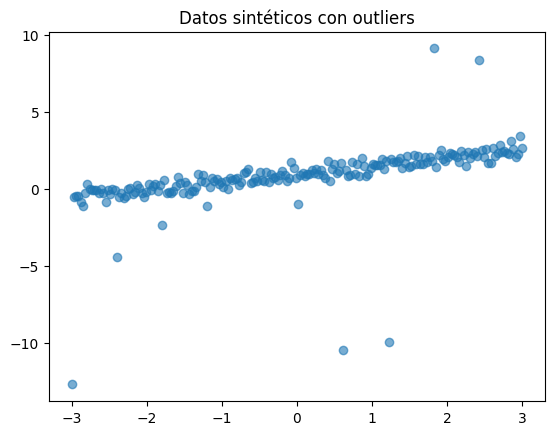

In [21]:
# Datos sintéticos
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y_true = 0.5 * X + 1 + 0.3 * np.random.randn(*X.shape)

# Añadimos outliers
y_true[::20] += np.random.randn(*y_true[::20].shape) * 6

plt.scatter(X, y_true, alpha=0.6)
plt.title("Datos sintéticos con outliers")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


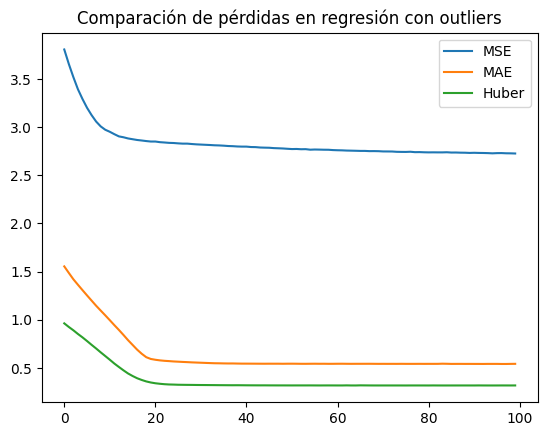

In [22]:
def build_reg_model():
    return tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])

losses = {
    "MSE": tf.keras.losses.MeanSquaredError(),
    "MAE": tf.keras.losses.MeanAbsoluteError(),
    "Huber": tf.keras.losses.Huber(delta=1.0)
}

histories = {}
preds = {}

for name, loss_fn in losses.items():
    model = build_reg_model()
    model.compile(optimizer="adam", loss=loss_fn)
    h = model.fit(X, y_true, epochs=100, verbose=0)
    histories[name] = h.history['loss']
    preds[name] = model.predict(X)

for name, loss in histories.items():
    plt.plot(loss, label=name)
plt.legend()
plt.title("Comparación de pérdidas en regresión con outliers")
plt.show()

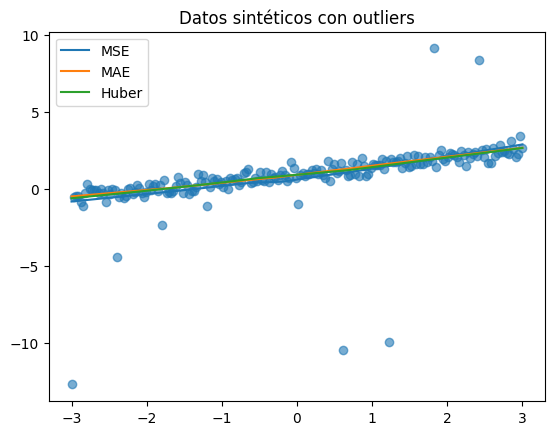

In [23]:
plt.scatter(X, y_true, alpha=0.6)
plt.plot(X, preds['MSE'], label="MSE")
plt.plot(X, preds['MAE'], label="MAE")
plt.plot(X, preds['Huber'], label="Huber")
plt.title("Datos sintéticos con outliers")
plt.legend()
plt.show()

### 5.2 Pérdidas para Clasificación

#### Binary Cross-Entropy
$$
L = - \frac{1}{N} \sum_i \big[ y_i \log \hat{y}_i + (1-y_i)\log(1-\hat{y}_i) \big]
$$

#### Categorical Cross-Entropy
$$
L = - \sum_{i=1}^C y_i \log \hat{y}_i
$$

#### Sparse Categorical Cross-Entropy
$$
L = - \log \hat{y}_i
$$

In [24]:
# Supongamos 3 clases
y_true_onehot = np.array([[0, 0, 1],   # clase 2
                          [1, 0, 0]])  # clase 0

y_true_onehot

array([[0, 0, 1],
       [1, 0, 0]])

In [29]:
y_true_sparse = np.array([2, 0])       # enteros: clase 2 y clase 0

In [30]:
# Predicciones (softmax simuladas)
y_pred = np.array([[0.1, 0.2, 0.7], 
                   [0.8, 0.1, 0.1]])

In [25]:
# Usando categorical_crossentropy (one-hot)
loss_cat = tf.keras.losses.CategoricalCrossentropy()
print("Categorical CE:", loss_cat(y_true_onehot, y_pred).numpy())

# Usando sparse_categorical_crossentropy (etiquetas como enteros)
loss_sparse = tf.keras.losses.SparseCategoricalCrossentropy()
print("Sparse Categorical CE:", loss_sparse(y_true_sparse, y_pred).numpy())

Categorical CE: 0.28990924
Sparse Categorical CE: 0.28990924


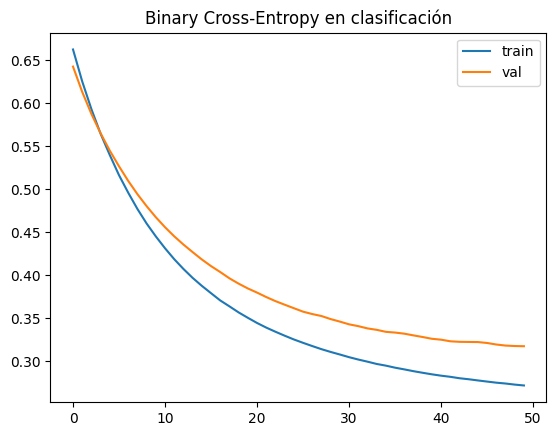

In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Datos clasificación binaria
X, y = make_moons(n_samples=500, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.title("Binary Cross-Entropy en clasificación")
plt.show()

In [27]:
# Example multiclass: MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Usamos sparse categorical, pues y son enteros [0..9]
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5


2025-10-03 11:42:55.037858: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_95', 4 bytes spill stores, 4 bytes spill loads



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8773 - loss: 0.4299 - val_accuracy: 0.9554 - val_loss: 0.1447
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9650 - loss: 0.1214 - val_accuracy: 0.9688 - val_loss: 0.1005
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9773 - loss: 0.0768 - val_accuracy: 0.9759 - val_loss: 0.0816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0557 - val_accuracy: 0.9741 - val_loss: 0.0856
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0427 - val_accuracy: 0.9746 - val_loss: 0.0836


In [31]:
pred = model.predict(X_test)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.09316605, 0.08796008, 0.0629041 , ..., 0.09910132, 0.09910803,
        0.06269527],
       [0.06237838, 0.20507836, 0.04939882, ..., 0.08619794, 0.06248969,
        0.07542792],
       [0.0951088 , 0.13736872, 0.09651263, ..., 0.14159319, 0.10022268,
        0.06069437],
       ...,
       [0.06595387, 0.10881681, 0.06046521, ..., 0.08061614, 0.09062447,
        0.06580912],
       [0.0711907 , 0.14225204, 0.07385663, ..., 0.12714082, 0.09821426,
        0.06623053],
       [0.06624632, 0.13071088, 0.05342307, ..., 0.10842695, 0.06699894,
        0.04633885]], dtype=float32)

### 5.3 Loss regularization


$$
L = L_{\text{data}} + \lambda \|W\|^2
$$

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", 
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                          input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax")
])